In [1]:
import boto3
import pandas as pd
from sagemaker import Session

session = Session()
bucket = session.default_bucket()

customers_data_key = 'udacity-capstone/data/Udacity_CUSTOMERS_052018.csv'
customers_data_location = 's3://{}/{}'.format(bucket, customers_data_key)

customers_df = pd.read_csv(customers_data_location, sep=';')

In [ ]:
germany_data_key = 'udacity-capstone/data/Udacity_AZDIAS_052018.csv'
germany_data_location = 's3://{}/{}'.format(bucket, germany_data_key)
germany_df = pd.read_csv(germany_data_location, sep=';')
germany_df.shape

In [2]:
customers_df.shape

(191652, 369)

In [3]:
customers_df.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,145056.000000,145056.000000,11766.000000,5100.000000,1275.000000,236.000000,139810.000000,141725.000000,...,143781.000000,143781.000000,143781.000000,137910.000000,145056.000000,141725.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,95826.500000,0.344359,1.747525,11.352009,12.337243,13.672353,14.647059,15.377119,10.331579,4.965863,...,4.374417,4.564769,3.168868,4.152716,8.646371,3.723133,2.576806,0.090247,1.376432,3.060907
std,55325.311233,1.391672,1.966334,6.275026,4.006050,3.243335,2.753787,2.307653,4.134828,14.309694,...,2.924355,2.887035,2.233516,1.974375,1.154001,2.095540,1.168486,0.286536,0.484492,1.086254
min,1.000000,-1.000000,1.000000,0.000000,2.000000,2.000000,5.000000,8.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,47913.750000,-1.000000,1.000000,8.000000,9.000000,11.000000,13.000000,14.000000,9.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,9.000000,2.000000,1.000000,0.000000,1.000000,3.000000
50%,95826.500000,0.000000,1.000000,11.000000,13.000000,14.000000,15.000000,16.000000,10.000000,1.000000,...,4.000000,4.000000,3.000000,5.000000,9.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,143739.250000,2.000000,1.000000,16.000000,16.000000,16.000000,17.000000,17.000000,13.000000,4.000000,...,7.000000,7.000000,4.000000,6.000000,9.000000,5.000000,3.000000,0.000000,2.000000,4.000000
max,191652.000000,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,523.000000,...,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,1.000000,2.000000,9.000000


In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA as sklearn_pca
from sagemaker import get_execution_role
from sagemaker import PCA

In [5]:
des = customers_df.describe()
count_series = des.loc['count',:].sort_values()
count_series.head(10)

ALTER_KIND4         236.0
ALTER_KIND3        1275.0
ALTER_KIND2        5100.0
ALTER_KIND1       11766.0
KK_KUNDENTYP      79715.0
EXTSEL992        106369.0
KBA05_KRSOBER    135672.0
KBA05_GBZ        135672.0
KBA05_HERST1     135672.0
KBA05_HERST2     135672.0
Name: count, dtype: float64

In [6]:
cols_to_zero = ['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4']
customers_df[cols_to_zero] = customers_df[cols_to_zero].fillna(0)

In [7]:
string_df = customers_df.select_dtypes(exclude=[np.number])
string_df.columns

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ',
       'PRODUCT_GROUP', 'CUSTOMER_GROUP'],
      dtype='object')

In [8]:
customers_df['CAMEO_DEUG_2015'].unique()

array([1.0, nan, 5.0, 4.0, 7.0, 3.0, 9.0, 2.0, 6.0, 8.0, '6', '3', '8',
       '9', '2', '4', '1', '7', '5', 'X'], dtype=object)

In [9]:
customers_df['CAMEO_DEUG_2015'].value_counts()

2      17574
4      16458
6      14008
3      13585
1      12498
8       9716
5       8624
7       7878
2.0     5910
4.0     5606
3.0     4805
9       4731
6.0     4709
1.0     4280
8.0     3333
5.0     3042
7.0     2680
9.0     1661
X        126
Name: CAMEO_DEUG_2015, dtype: int64

In [10]:
customers_df = customers_df[customers_df.CAMEO_DEUG_2015 != 'X']

In [11]:
customers_df['CAMEO_INTL_2015'].unique()

array([13.0, nan, 34.0, 24.0, 41.0, 23.0, 15.0, 55.0, 14.0, 22.0, 43.0,
       51.0, 33.0, 25.0, 44.0, 54.0, 32.0, 12.0, 35.0, 31.0, 45.0, 52.0,
       '45', '25', '55', '51', '14', '54', '43', '22', '15', '24', '35',
       '23', '12', '44', '41', '52', '31', '13', '34', '32', '33'],
      dtype=object)

In [12]:
string_df = customers_df.select_dtypes(exclude=[np.number])
string_df.columns

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ',
       'PRODUCT_GROUP', 'CUSTOMER_GROUP'],
      dtype='object')

In [13]:
cols_to_drop = ['CAMEO_DEU_2015','D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ','PRODUCT_GROUP', 
                'CUSTOMER_GROUP']
customers_df = customers_df.drop(cols_to_drop, axis=1)
customers_df.shape

(191526, 363)

In [14]:
customers_df = customers_df.dropna()
customers_df.shape

(54251, 363)

In [15]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customers_df.astype(float)))
scaled_df.shape

(54251, 363)

In [39]:
NUM_COMPONENTS = 20
pca = sklearn_pca(n_components=NUM_COMPONENTS)
pca.fit(scaled_df)
print(np.sum(pca.explained_variance_ratio_))
v_sklearn = -1*np.flip(pca.components_.T, axis=1)
print(v_sklearn.shape)
v_sklearn_df = pd.DataFrame(v_sklearn)


0.4242638623706379
(363, 20)


In [ ]:
os.system('pip install mxnet')

{'s': 
 [ 15.7960005  15.8863945  16.101652   16.270885   16.342955   16.536232
   16.564827   16.645939   16.758272   16.90528    16.95308    17.036749
   17.149862   17.18792    17.306973   17.454706   17.51808    17.55705
   17.691868   17.71852    17.854877   18.088581   18.370773   18.645721
   18.765373   18.842127   18.932903   19.013872   19.10982    19.174225
   19.236465   19.512094   19.606735   19.7596     19.796417   19.912495
   20.009897   20.112577   20.17225    20.291168   20.559002   21.08198
   21.135729   21.308935   21.514282   21.803993   21.98405    22.06909
   22.303505   22.40907    22.526188   22.678274   22.760735   23.01017
   23.1324     23.360695   23.490795   23.60345    23.74429    23.94473
   24.0664     24.11213    24.305952   24.466272   24.722345   24.841356
   25.080648   25.155298   25.270132   25.417679   25.711374   25.937727
   26.145014   26.253607   26.285095   26.513292   26.64795    26.75313
   26.932314   27.027277   27.218704   27.291477  

In [29]:
s.head()

,0
0,15.796000
1,15.886395
2,16.101652
3,16.270885
4,16.342955


In [31]:
explained_variance(s, 150)

0    0.902343
dtype: float32

In [19]:
features_list = list(customers_df.columns)
len(features_list)

363

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def display_component(v, features_list, component_num, n_weights=10):
    col_idx = NUM_COMPONENTS-component_num
    v_1_col = v.iloc[:, col_idx]
    v_1 = np.squeeze(v_1_col.values)
    weights = pd.DataFrame(list(zip(v_1, features_list)), columns=['weight', 'feature'])
    weights['abs_weight'] = weights['weight'].apply(lambda x: np.abs(x))
    sorted_weight_data = weights.sort_values('abs_weight', ascending=False).head(n_weights)
    ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(data=sorted_weight_data, x='weight', y='feature', palette='Blues_d')
    ax.set_title(f'PCA Component Makeup for Component #{component_num}')
    plt.show()

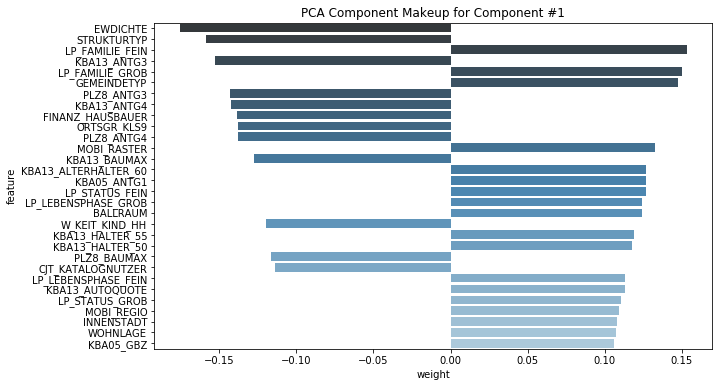

In [106]:
num = 1
display_component(v_sklearn_df, features_list, num, n_weights=30)

In [ ]:
v.iloc[:,299]

In [52]:
v_sklearn_df.shape

(363, 20)

In [125]:
def get_absolute_component_ranking(v, features_list, top_n):
    cols = v.shape[1]
    top_features = {}
    abs_v = np.abs(v)
    for col in range(cols):
        for row in range(len(features_list)):
            feature = features_list[row]
            value = abs_v.iloc[row, col]
            if feature in top_features:
                if value > top_features[feature]:
                    top_features[feature] = value
            else:
                top_features[feature] = value
                

    # now get the top three features per component to be included for sure
    for col in range(cols):
        col_v = abs_v.iloc[:,col].values.copy()
        idx_list = col_v.argsort()[-3:][::-1]
        first = features_list[idx_list[0]]
        second = features_list[idx_list[1]]
        third = features_list[idx_list[2]]
        top_features[first] = np.inf
        top_features[second] = np.inf
        top_features[third] = np.inf
    
    sorted_f_list = [(k, v) for k, v in sorted(top_features.items(), reverse=True, key= lambda x: x[1])]
    top_f_list = sorted_f_list[:top_n]
        
    return top_f_list
        


In [126]:
top_f = get_absolute_component_ranking(v_sklearn_df, features_list, 50)

In [130]:
top_f[0][0]

'BALLRAUM'

In [128]:
top_f[100:]

[]

In [112]:
output_path = f's3://{bucket}/udacity-capstone/output/'
role = get_execution_role()
output_path

's3://sagemaker-us-west-2-745267682532/udacity-capstone/output/'

In [ ]:
NUM_COMPONENTS = 300

pca = PCA(role=role,
          instance_count=1,
          instance_type='ml.c4.xlarge',
          output_path=output_path,
          num_components=NUM_COMPONENTS,
          sagemaker_session=session)

In [ ]:
# need a record set for PCA
scaled_data_np = scaled_df.values.astype('float32')
formatted_train_data = pca.record_set(scaled_data_np)

In [ ]:
pca.fit(formatted_train_data)

In [ ]:
train_name = 'pca-2020-11-07-02-04-15-478'
model_key = f'udacity-capstone/output/{train_name}/output/model.tar.gz'
model_key

In [ ]:
boto3.resource('s3').Bucket(bucket).download_file(model_key, 'model.tar.gz')

In [ ]:
import os
os.system('tar -zxvf model.tar.gz')

In [ ]:
import mxnet as mx
pca_model_params = mx.ndarray.load('model_algo-1')
pca_model_params

In [ ]:
s = pd.DataFrame(pca_model_params['s'].asnumpy())
v = pd.DataFrame(pca_model_params['v'].asnumpy())

In [ ]:
def explained_variance(s, n_top_components, num_components=300):
    start_idx = num_components - n_top_components
    exp_variance = np.square(s.iloc[start_idx:,:]).sum()/np.square(s).sum()
    return exp_variance